<a href="https://colab.research.google.com/github/Siraj19/IPFSP/blob/main/ML_Course_Project_Scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions:** Just open it on Google Collab or as Juypter Notebook.

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/ICreatedManually/ML_Course_Project/OGDCL_DATASET_V4.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the excel file dataset
def load_excel_file(file_path):
    try:
        # Load Excel file
        xls = pd.ExcelFile(file_path)

        # Load each sheet into a dictionary
        data = {}
        for sheet_name in xls.sheet_names:
            data[sheet_name] = pd.read_excel(xls, sheet_name)

        return data

    except Exception as e:
        print("Error loading Excel file:", e)
        return None

In [ ]:
# Load Excel file
loaded_data = load_excel_file(file_path)

In [ ]:
# If data is loaded successfully, print it
if loaded_data is not None:
    for sheet_name, sheet_data in loaded_data.items():
        print(f"Sheet Name: {sheet_name}")
        print(sheet_data)

Sheet Name: Yearly_Financial_Statement
    Year         Equity         Assets   Liabilities  Current Assets  \
0   1999    33140000000    54489000000   21349000000     24133000000   
1   2000    41499000000    59218000000   17719000000     29291000000   
2   2001    51279000000    67762000000   16483000000     38121000000   
3   2002    57239568000    74875595000   17636027000     36677661000   
4   2003    64096779000    81815042000   17718263000     44039954000   
5   2004    83190000000   104940000000   21750000000     57870000000   
6   2005    90070000000   123280000000   33210000000     72710000000   
7   2006   101470000000   129210000000   27740000000     76820000000   
8   2007   106940000000   136750000000   29810000000     74920000000   
9   2008   110420000000   152310000000   41890000000     79820000000   
10  2009   126170000000   177990000000   51820000000     86830000000   
11  2010   114380000000   228870000000  114490000000    120430000000   
12  2011   158560000000  

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# Assuming loaded_data is a dictionary where keys are sheet names and values are Pandas DataFrames
# Assuming features_columns contains the names of the columns to be used as features
# Assuming label_column contains the name of the column to be used as label

# 1. Select the desired columns from your DataFrame
sheet_name1 = 'Yearly_Profit_Loss_Statement'
sheet_name2 = 'Yearly_Financial_Statement'

features_columns1 = ['Sales', 'Other Revenues', 'Earnings(Pre Tax)', 'Earnings(Post Tax)', 'Crude Oil (Thousand Barrels)', 'Gas (MMcf)', 'Payouts/Dividends', 'Payouts/Dividends Ratio', 'USD to PKR']
features_columns2 = ['Equity', 'Assets', 'Liabilities', 'Current Assets', 'Non-current Assets', 'Current Liabilities', 'Non Current Liabilities', 'ROE', 'ROA', 'Debt/Equity', 'Debt/Asset', 'SBP Policy Rate']


# Get the DataFrame for the specified sheet
df1 = loaded_data[sheet_name1]
df2 = loaded_data[sheet_name2]

# Select features
features1 = df1[features_columns1]
features2 = df2[features_columns2]

# Concatenate features along the appropriate axis
features = pd.concat([features1, features2], axis=1)


# Calculate the mean for each feature
maxs = features.max()

features_scale_factor = np.array(maxs)
normalized_features = features.div(maxs)

In [ ]:
print(normalized_features)

       Sales  Other Revenues  Earnings(Pre Tax)  Earnings(Post Tax)  \
0   0.034406        0.003631           0.012429            0.020256   
1   0.061172        0.005507           0.033744            0.047013   
2   0.092604        0.009683           0.060531            0.073457   
3   0.096255        0.012346           0.066941            0.074659   
4   0.108973        0.012043           0.068843            0.092022   
5   0.124108        0.007928           0.079527            0.099768   
6   0.178220        0.013798           0.127733            0.146781   
7   0.235281        0.026628           0.171353            0.203900   
8   0.243550        0.024389           0.158298            0.201451   
9   0.304432        0.023663           0.204055            0.197400   
10  0.316328        0.020758           0.210882            0.247262   
11  0.344713        0.020334           0.230737            0.263467   
12  0.376291        0.020455           0.237069            0.282833   
13  0.

In [ ]:
data = normalized_features.values

In [ ]:
# Define window size and step size
window_size = 3  # Number of past observations to consider
step_size = 1     # Step size for sliding window

# Prepare input sequences and target values
X = []
y = []
for i in range(len(data) - window_size - 1):
    X.append(data[i:(i + window_size)])
    y.append(data[i + window_size])
X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
print(y_test)

[[0.49648202 0.11546841 0.29348308 0.35054759 0.94429624 0.8965832
  0.91449869 0.56210477 0.4337271  0.50841029 0.46801028 0.33977681
  0.42315759 0.56053469 0.34290204 0.33698523 0.27641952 0.33330418
  0.21034974 0.34769408 0.39047619]
 [0.63222031 0.2248245  0.46017146 0.52706794 0.92447917 0.88943585
  1.         0.40880347 0.53640707 0.59674602 0.5583019  0.4362766
  0.53118141 0.61424741 0.4342727  0.43806656 0.35408956 0.42009418
  0.23010973 0.37424136 0.61109524]
 [0.5631906  0.24134592 0.37616281 0.44938118 0.82056657 0.78531753
  0.6181392  0.29638252 0.57580498 0.65616896 0.62425062 0.52293874
  0.57873151 0.71814973 0.55514116 0.49417441 0.27455872 0.3203355
  0.25084053 0.40119065 0.53333333]
 [0.57810876 0.12267006 0.33611278 0.4074882  0.84032012 0.76264781
  0.61849818 0.32704278 0.58032516 0.71072634 0.67131319 0.54621209
  0.67840443 0.65668501 0.63169158 0.46985882 0.22985221 0.27010898
  0.24189199 0.38966831 0.45619048]
 [0.81109311 0.3067054  0.60588373 0.595583

In [ ]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

In [ ]:
from keras.layers import Dense
from keras.layers import Activation
#from keras.layers import Activation
# Define the RNN model with an additional Dense layer
model = Sequential([
    LSTM(units=64, input_shape=(window_size, len(features_columns1)+len(features_columns2))),
    Dense(units=32, activation='relu'),  # Additional Dense layer
    Dense(units=32, activation='relu'),  # Additional Dense layer
    Dense(units=len(features_columns1)+len(features_columns2)),  # Output layer with the same number of features
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=1500, batch_size=15, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/1500
1/1 [==============================] - 8s 8s/step - loss: 0.2242 - val_loss: 0.2471
Epoch 2/1500
1/1 [==============================] - 0s 141ms/step - loss: 0.2178 - val_loss: 0.2387
Epoch 3/1500
1/1 [==============================] - 0s 81ms/step - loss: 0.2118 - val_loss: 0.2309
Epoch 4/1500
1/1 [==============================] - 0s 114ms/step - loss: 0.2063 - val_loss: 0.2236
Epoch 5/1500
1/1 [==============================] - 0s 89ms/step - loss: 0.2015 - val_loss: 0.2174
Epoch 6/1500
1/1 [==============================] - 0s 66ms/step - loss: 0.1970 - val_loss: 0.2114
Epoch 7/1500
1/1 [==============================] - 0s 56ms/step - loss: 0.1924 - val_loss: 0.2054
Epoch 8/1500
1/1 [==============================] - 0s 90ms/step - loss: 0.1876 - val_loss: 0.1993
Epoch 9/1500
1/1 [==============================] - 0s 95ms/step - loss: 0.1828 - val_loss: 0.1930
Epoch 10/1500
1/1 [==============================] - 0s 91ms/step - loss: 0.1779 - val_loss: 0.1865
Epoch 11/

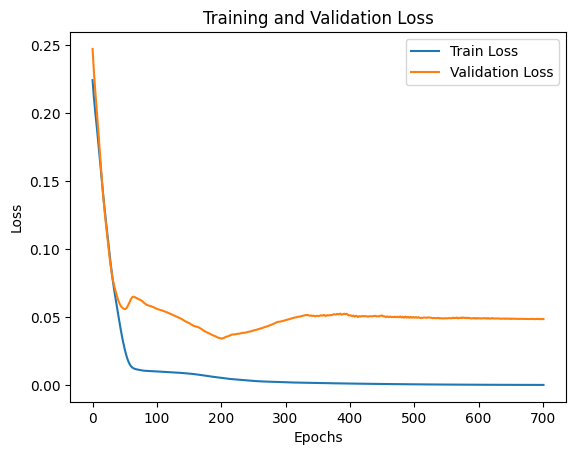

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Extract training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

1/1 [==============================] - 0s 26ms/step - loss: 0.0874
Test Loss: 0.08742072433233261


In [ ]:
# Assuming your model has been trained and is named 'model'

# Predict the next value based on the last window of observations
last_window = X_test[-1:]
predicted_value_normalized = model.predict(last_window)

# Define feature names
feature_names = ['Sales', 'Other Revenues', 'Earnings(Pre Tax)', 'Earnings(Post Tax)', 'Crude Oil (Thousand Barrels)', 'Gas (MMcf)', 'Payouts/Dividends', 'Payouts/Dividends Ratio', 'USD to PKR', 'Equity', 'Assets', 'Liabilities', 'Current Assets', 'Non-current Assets', 'Current Liabilities', 'Non Current Liabilities', 'ROE', 'ROA', 'Debt/Equity', 'Debt/Asset', 'SBP Policy Rate']

# Scale back the predicted value
predicted_value_scaled_back = predicted_value_normalized * features_scale_factor

# Convert the predicted value to a scalar (assuming it's a single value)
predicted_value_scaled_back_scalar = predicted_value_scaled_back[0]

# Create a string with feature name and corresponding scaled back value
scaled_back_values_str = ', '.join([f'{name}: {value:.2f}' for name, value in zip(feature_names, predicted_value_scaled_back_scalar)])

print("Scaled back predicted values:")
print(scaled_back_values_str)


1/1 [==============================] - 0s 483ms/step
Scaled back predicted values:
Sales: 185008625431.66, Other Revenues: 11651210285.43, Earnings(Pre Tax): 108374776904.58, Earnings(Post Tax): 75078820655.94, Crude Oil (Thousand Barrels): 15285.86, Gas (MMcf): 412672.69, Payouts/Dividends: 28588330861.81, Payouts/Dividends Ratio: 0.34, USD to PKR: 133.87, Equity: 181431532985.72, Assets: 415418697697.88, Liabilities: 88778297559.62, Current Assets: 129206494540.31, Non-current Assets: 156896489110.11, Current Liabilities: 35167016853.19, Non Current Liabilities: 69855714203.60, ROE: 0.39, ROA: 0.24, Debt/Equity: 0.45, Debt/Asset: 0.39, SBP Policy Rate: 0.13


In [ ]:
# Assuming your model has been trained and is named 'model'

# Predict the next value based on the last window of observations
last_window = X_test[-1:]
predicted_value_normalized = model.predict(last_window)

# Define feature names
feature_names = ['Sales', 'Other Revenues', 'Earnings(Pre Tax)', 'Earnings(Post Tax)', 'Crude Oil (Thousand Barrels)', 'Gas (MMcf)', 'Payouts/Dividends', 'Payouts/Dividends Ratio', 'USD to PKR', 'Equity', 'Assets', 'Liabilities', 'Current Assets', 'Non-current Assets', 'Current Liabilities', 'Non Current Liabilities', 'ROE', 'ROA', 'Debt/Equity', 'Debt/Asset', 'SBP Policy Rate']

# Scale back the predicted value
predicted_value_scaled_back = predicted_value_normalized * features_scale_factor

# Convert the predicted value to a scalar (assuming it's a single value)
predicted_value_scaled_back_scalar = predicted_value_scaled_back[0]

# Create a string with feature name and corresponding scaled back value
scaled_back_values_str = ', '.join([f'{name}: {value:.2f}' for name, value in zip(feature_names, predicted_value_scaled_back_scalar)])

# Iterate over each point in the last window, scale it, and print them individually
for i, point in enumerate(last_window[0]):
    scaled_point = point * features_scale_factor
    point_str = ', '.join([f'{name}: {value:.2f}' for name, value in zip(feature_names, scaled_point)])
    print(f"Point {i+1}:")
    print(point_str)

print("\nScaled back predicted values:")
print(scaled_back_values_str)

1/1 [==============================] - 0s 24ms/step
Point 1:
Sales: 261480000000.00, Other Revenues: 37150000000.00, Earnings(Pre Tax): 176600000000.00, Earnings(Post Tax): 118390000000.00, Crude Oil (Thousand Barrels): 14555.00, Gas (MMcf): 370217.00, Payouts/Dividends: 47356000000.00, Payouts/Dividends Ratio: 0.40, USD to PKR: 150.10, Equity: 646214995000.00, Assets: 795058357000.00, Liabilities: 148843362000.00, Current Assets: 509465463000.00, Non-current Assets: 285592894000.00, Current Liabilities: 69902275000.00, Non Current Liabilities: 78941087000.00, ROE: 0.18, ROA: 0.15, Debt/Equity: 0.23, Debt/Asset: 0.19, SBP Policy Rate: 0.13
Point 2:
Sales: 232930000000.00, Other Revenues: 39880000000.00, Earnings(Pre Tax): 144360000000.00, Earnings(Post Tax): 100940000000.00, Crude Oil (Thousand Barrels): 12919.00, Gas (MMcf): 326879.00, Payouts/Dividends: 29272600000.00, Payouts/Dividends Ratio: 0.29, USD to PKR: 161.13, Equity: 710563976000.00, Assets: 888973636000.00, Liabilities: 17

In [ ]:
print("\n")
print("Accounting Error A-L-E in Billions: ")
print((predicted_value_scaled_back[0][10]-predicted_value_scaled_back[0][11]-predicted_value_scaled_back[0][9])/1000000000)

print("\n")
print("Accounting Error A-CA-NCA in Billions: ")
print((predicted_value_scaled_back[0][10]-predicted_value_scaled_back[0][12]-predicted_value_scaled_back[0][13])/1000000000)

print("\n")
print("Accounting Error L-CL-NCL in Billions: ")
print((predicted_value_scaled_back[0][11]-predicted_value_scaled_back[0][14]-predicted_value_scaled_back[0][15])/1000000000)

print("\n")
print("Accounting Error ROE in Ration diff: ")
print((predicted_value_scaled_back[0][16]-(predicted_value_scaled_back[0][3]/predicted_value_scaled_back[0][9])))

print("\n")
print("Accounting Error ROA in Ration diff: ")
print((predicted_value_scaled_back[0][17]-(predicted_value_scaled_back[0][3]/predicted_value_scaled_back[0][10])))

print("\n")
print("Accounting Error Debt/Equity in Ration diff: ")
print((predicted_value_scaled_back[0][18]-(predicted_value_scaled_back[0][11]/predicted_value_scaled_back[0][9])))



Accounting Error A-L-E in Billions: 
145.2088671525418


Accounting Error A-CA-NCA in Billions: 
129.31571404745327


Accounting Error L-CL-NCL in Billions: 
-16.244433497168426


Accounting Error ROE in Ration diff: 
-0.020134199505671024


Accounting Error ROA in Ration diff: 
0.05964155045418121


Accounting Error Debt/Equity in Ration diff: 
-0.041305302094277296
